In [15]:
import nltk

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [210]:
#nltk.download_shell()

Import the coronavirus tweets dataset and perform exploratory data analysis. The dataset is from https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification.

In [4]:
df = pd.read_csv('C:/Users/Lenovo/Desktop/datasets/corona_tweets.csv')

In [5]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


How many tweets are there in each sentiment class?

In [6]:
df.groupby('Sentiment').size()

Sentiment
Extremely Negative     592
Extremely Positive     599
Negative              1041
Neutral                619
Positive               947
dtype: int64

How many different days were the tweets posted on?

In [7]:
df.TweetAt.nunique()

15

How manys tweets are there in each day?

<AxesSubplot:xlabel='TweetAt'>

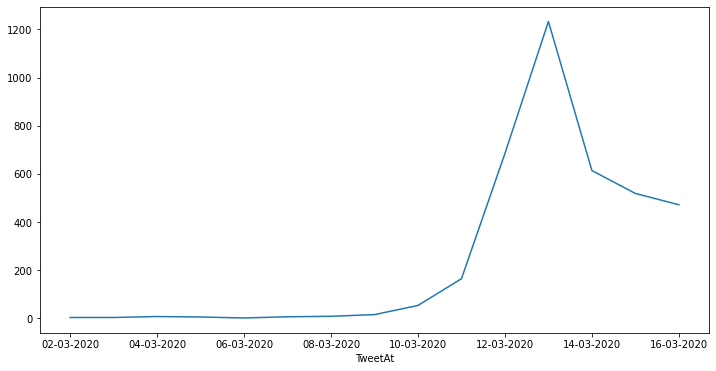

In [18]:
df.groupby('TweetAt').size().plot(figsize=(12,6))

The peak point of the graph is 2 days after the WHO declared the COVID outbreak as pandemic.

In [19]:
s = 'I feel bored'
nltk.word_tokenize(s)

['I', 'feel', 'bored']

In [22]:
len(df.iloc[0]['OriginalTweet'])

228

Add a new column showing the length of characters per tweet and display how the lengths are distributed all over the dataset. 

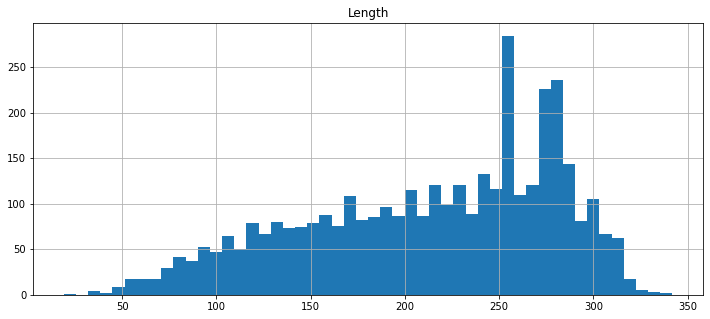

In [36]:
df['Length'] =  df['OriginalTweet'].apply(len)
df.hist(column='Length', bins=50, figsize=(12,5));

Now show how the number of characters per sentiment class are distributed.

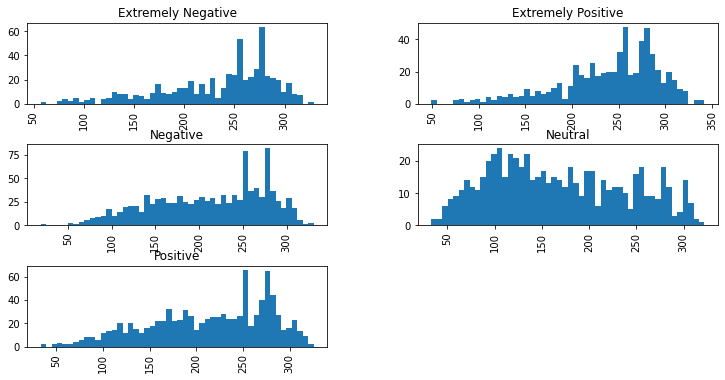

In [32]:
df['Length'] =  df['OriginalTweet'].apply(len)
df.hist(column='Length', bins=50, by='Sentiment', figsize=(12,6));

Each graphs demonstrates very similar trends except for neutral tweets. Neutral tweets generally contain 50 to 200 characters whereas tweets in other classes show a steady increase in numbers, and have two distinct peaks between 250 and 270. <br> <br>
Show one of the tweets having the largest length.

In [39]:
df[df['Length'] == max(df['Length'])]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Length
2400,2401,47353,"Alberta, Canada",14-03-2020,"In a Calgary grocery store lineup, I said to m...",Extremely Positive,342
2576,2577,47529,"North East, England",14-03-2020,Heres a list of all @WEFoodbank Drop-Off poin...,Extremely Positive,342


In [45]:
df[df['Length'] == max(df['Length'])].iloc[0].OriginalTweet

'In a Calgary grocery store lineup, I said to my wife, "this #coronavirus thing feels like Christmas to me".\r\r\n\r\r\nWhy? She asked.?\r\r\n\r\r\n"I know it\'s not joyous" I said "but it seems everybody has stepped off their rat race treadmills &amp; are open to being human".\r\r\n\r\r\nI expect great revival.? https://t.co/Qgtep7nLQa https://t.co/eWCXfHjuzV'

# NLP

Remove the punctuations and stopwords from the tweets and return the remaining words as a list.

In [54]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [48]:
import string 

puncs = string.punctuation
puncs

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [64]:
def clean(tweet):
    tweet_no_punc = [item for item in tweet if not item in puncs]
    tweet = ''.join(tweet_no_punc)
    
    return [item for item in tweet.split() if item.lower() not in stopwords]

In [65]:
df['CleanTweet'] = df['OriginalTweet'].apply(clean)
df.sample(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Length,CleanTweet
3598,3599,48551,NaN,16-03-2020,"https://t.co/zuV4t1aKDZ is located in Plano, T...",Negative,284,"[httpstcozuV4t1aKDZ, located, Plano, TX, Oprah..."
2528,2529,47481,WNY,14-03-2020,Just stood behind someone buying $300 worth of...,Positive,113,"[stood, behind, someone, buying, 300, worth, m..."
1630,1631,46583,NaN,13-03-2020,I have never seen anything like this #coronavi...,Negative,276,"[never, seen, anything, like, coronavirusThe, ..."


Get the matrix of token counts.

In [91]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer=clean).fit(df.OriginalTweet)

In [101]:
len(cv.vocabulary_)

17027

Get the bag of words for a specific tweet.

In [156]:
df.loc[30, 'OriginalTweet']

"Two important phone numbers NYers should know. If you have no doctor or insurance and think you may be sick and need to be tested for #coronavirus, call the state's helpline: 1-888-364-3065. To report price gouging, call the Div. of Consumer Protection at 1-800-697-1220."

In [104]:
bag_30 = cv.transform([df.loc[30, 'OriginalTweet']])
print(bag_30)

  (0, 108)	1
  (0, 113)	1
  (0, 1458)	1
  (0, 1815)	1
  (0, 3669)	1
  (0, 4229)	1
  (0, 5372)	1
  (0, 6876)	2
  (0, 7542)	1
  (0, 8153)	1
  (0, 9276)	1
  (0, 9535)	1
  (0, 11626)	1
  (0, 11786)	1
  (0, 12040)	1
  (0, 12524)	1
  (0, 12874)	1
  (0, 13033)	1
  (0, 13532)	1
  (0, 13816)	1
  (0, 14309)	1
  (0, 14976)	1
  (0, 15325)	1
  (0, 15794)	1
  (0, 15864)	1


Extract the output feature name searching by an index.

In [116]:
cv.get_feature_names_out()[6876]

'call'

In [122]:
bag_30.shape

(1, 17027)

Now, get the bag of words for all messages.

In [126]:
bag_all = cv.transform(df['OriginalTweet'])

How many nonzero entry does the bag of words for all tweets have?.

In [132]:
bag_all.nnz

73632

Calculate the sparsity of the bag_all.

In [137]:
sparsity = bag_all.nnz / (bag_all.shape[0] * bag_all.shape[1]) * 100
print('The sparsity of the matrix for token counts is {}'.format(sparsity))

The sparsity of the matrix for token counts is 0.11386060852520172


In [147]:
from sklearn.feature_extraction.text import TfidfTransformer

In [169]:
tfidf = TfidfTransformer()
tfidf.fit(bag_all)

TfidfTransformer()

In [170]:
tfidf_30 = tfidf.transform(bag_30)
print(tfidf_30)

  (0, 15864)	0.13581336322688947
  (0, 15794)	0.18083305972009306
  (0, 15325)	0.2028673099779884
  (0, 14976)	0.14374337188133682
  (0, 14309)	0.1820585635611603
  (0, 13816)	0.16188185470503247
  (0, 13532)	0.19241090781754688
  (0, 13033)	0.21503964631884862
  (0, 12874)	0.10515342647780267
  (0, 12524)	0.14444977330285744
  (0, 12040)	0.13475989811029668
  (0, 11786)	0.1796556274269479
  (0, 11626)	0.1698862272203001
  (0, 9535)	0.2566571391525049
  (0, 9276)	0.1961683898870247
  (0, 8153)	0.2083407262278849
  (0, 7542)	0.0655056173858688
  (0, 6876)	0.32772391487419184
  (0, 5372)	0.2083407262278849
  (0, 4229)	0.19823960247737388
  (0, 3669)	0.2566571391525049
  (0, 1815)	0.2566571391525049
  (0, 1458)	0.16598194449026607
  (0, 113)	0.2566571391525049
  (0, 108)	0.2566571391525049


In [172]:
tfidf_all = tfidf.transform(bag_all)

Get the tfidf value for 'coronavirus' and 'covid'. Note that the greater the tfidf values is, the less occurrence it has in the dataset.

In [183]:
print(tfidf.idf_[cv.vocabulary_['coronavirus']], tfidf.idf_[cv.vocabulary_['covid']])

2.1820167871878247 5.984396615166143


Predict the sentiment of a specific message with Naive-Bayes.

In [184]:
from sklearn.naive_bayes import MultinomialNB

In [186]:
model = MultinomialNB().fit(tfidf_all, df.Sentiment)

In [189]:
model.predict(bag_30)

array(['Negative'], dtype='<U18')

In [193]:
df.iloc[30, -3]

'Negative'

Predict the sentiment of all tweets.

In [195]:
pred = model.predict(bag_all)
pred

array(['Negative', 'Positive', 'Extremely Positive', ..., 'Neutral',
       'Extremely Negative', 'Extremely Positive'], dtype='<U18')

In [196]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df.Sentiment, pred)

array([[ 181,    1,  375,    1,   34],
       [   0,  229,  187,    0,  183],
       [   0,    0, 1031,    1,    9],
       [   0,    2,  305,  227,   85],
       [   0,    0,  125,    0,  822]], dtype=int64)

# Pipeline

Build a pipeline predicting the sentiment of the tweets, and get the classification report of the model.

In [202]:
from sklearn.model_selection import train_test_split

X = df.OriginalTweet
y = df.Sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [204]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer=clean)),
    ('tfidf', TfidfTransformer()),
    ('naive-bayes', MultinomialNB())
])

In [205]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(analyzer=<function clean at 0x000001BEA3F61AF0>)),
                ('tfidf', TfidfTransformer()),
                ('naive-bayes', MultinomialNB())])

In [206]:
predictions = pipeline.predict(X_test)

In [209]:
from sklearn.metrics import confusion_matrix, classification_report
print((confusion_matrix(y_test, predictions)))
print('\n')
print(classification_report(y_test, predictions))

[[  1   0 106   0  15]
 [  0   2  39   0  73]
 [  0   0 175   0  54]
 [  0   0  77   3  48]
 [  0   0  89   0  78]]


                    precision    recall  f1-score   support

Extremely Negative       1.00      0.01      0.02       122
Extremely Positive       1.00      0.02      0.03       114
          Negative       0.36      0.76      0.49       229
           Neutral       1.00      0.02      0.05       128
          Positive       0.29      0.47      0.36       167

          accuracy                           0.34       760
         macro avg       0.73      0.26      0.19       760
      weighted avg       0.65      0.34      0.24       760

